In [2]:
import keras
from keras.applications.mobilenet import MobileNet
from keras.layers import Dense, Input, Dropout
from keras.models import Model

mobile=keras.applications.mobilenet.MobileNet()
mobile.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
x=mobile.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)
for layer in model.layers[:-5]:
    layer.trainable=False
    
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 252s 255ms/step - loss: 0.0824 - accuracy: 0.9677 - val_loss: 0.3044 - val_accuracy: 0.9476
Epoch 2/20
990/990 [==============================] - 130s 132ms/step - loss: 0.0224 - accuracy: 0.9949 - val_loss: 0.0892 - val_accuracy: 0.9718
Epoch 3/20
990/990 [==============================] - 126s 127ms/step - loss: 6.6851e-04 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 4/20
990/990 [==============================] - 127s 129ms/step - loss: 3.4601e-04 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9839
Epoch 5/20
990/990 [==============================] - 130s 131ms/step - loss: 3.0384e-05 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9879
Epoch 6/20
990/990 [==============================] - 127s 129ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9960
Epoch 7/20
990/990 [==============================] - 126s 127ms/s

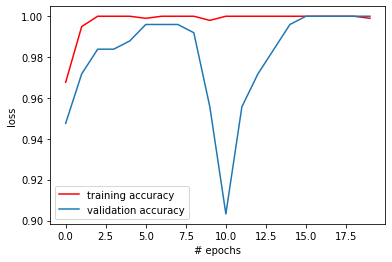

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 32s 228ms/step
[4.84647324006748e-06, 1.0]
